In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install diffusers
!pip install transformers
!pip install matplotlib




Looking in indexes: https://download.pytorch.org/whl/cu121
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 20.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.0 MB ? eta -:--:--
   --------------- ------------------------ 3.9/10.0 MB 19.5 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/10.0 MB 16.1 MB/s eta 0:00:01
   ------------------------------------ --- 9.2/10.0 MB 14.6 MB/s eta 0:00:01
   ---------------------------------------- 10.0/10.0 MB 14.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 15.0 MB/s eta 0:00:00


In [2]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
NVIDIA GeForce RTX 3050 6GB Laptop GPU


In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch 

c:\Users\AYUSH\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
!pip show torch

Name: torch
Version: 2.4.1+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: c:\users\ayush\appdata\local\programs\python\python38\lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: torchaudio, torchvision, ultralytics, ultralytics-thop


In [6]:
!pip install accelerate

In [7]:
model_id="dreamlike-art/dreamlike-photoreal-2.0"
pipe = StableDiffusionPipeline.from_pretrained(model_id , torch_dtype=torch.float16 , use_safetensors=True)
pipe=pipe.to("cuda")


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Loading pipeline components...: 100%|██████████| 5/5 [00:00<00:00, 26.17it/s]


In [8]:
prompt="""dreamlikeart , A young college student is sitting cross-legged on a rolling chair in a cozy, dimly lit bedroom, deeply focused on coding on his sleek laptop. The room has a warm, ambient glow from LED strip lights running along the ceiling edges, casting a soft blue and purple hue. His desk is cluttered with open notebooks, a coffee mug, a few snack wrappers, and a second monitor displaying lines of colorful code. The student is wearing headphones, glasses slightly tilted, with messy hair and a hoodie, embodying the late-night grind. On the wall behind him are pinned sticky notes, a small calendar marked with deadlines, and a poster of a famous coder or tech company. Outside the window, it's raining lightly, and city lights blur through the glass, giving a moody, focused atmosphere. A faint glow from the laptop screen lights up his face, showing concentration and determination. """

In [9]:
image = pipe(prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (187 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["few snack wrappers , and a second monitor displaying lines of colorful code . the student is wearing headphones , glasses slightly tilted , with messy hair and a hoodie , embodying the late - night grind . on the wall behind him are pinned sticky notes , a small calendar marked with deadlines , and a poster of a famous coder or tech company . outside the window , it 's raining lightly , and city lights blur through the glass , giving a moody , focused atmosphere . a faint glow from the laptop screen lights up his face , showing concentration and determination ."]
c:\Users\AYUSH\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\models\clip\modeling_clip.py:540: UserWarning: 1Torch was n

[PROMPT]:  dreamlikeart , A young college student is sitting cross-legged on a rolling chair in a cozy, dimly lit bedroom, deeply focused on coding on his sleek laptop. The room has a warm, ambient glow from LED strip lights running along the ceiling edges, casting a soft blue and purple hue. His desk is cluttered with open notebooks, a coffee mug, a few snack wrappers, and a second monitor displaying lines of colorful code. The student is wearing headphones, glasses slightly tilted, with messy hair and a hoodie, embodying the late-night grind. On the wall behind him are pinned sticky notes, a small calendar marked with deadlines, and a poster of a famous coder or tech company. Outside the window, it's raining lightly, and city lights blur through the glass, giving a moody, focused atmosphere. A faint glow from the laptop screen lights up his face, showing concentration and determination. 


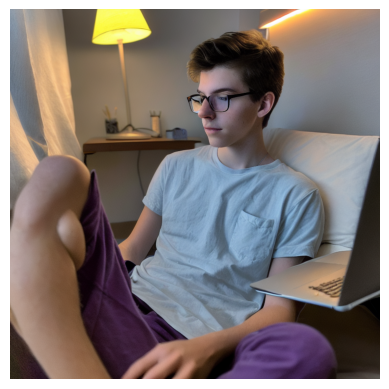

In [10]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [ ]:
##finetuning now 
!pip install --upgrade pip

In [ ]:
!pip install diffusers[training] transformers accelerate safetensors peft


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from peft import LoraConfig
from torch import nn
import os


In [ ]:
model_id = "dreamlike-art/dreamlike-photoreal-2.0"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")


In [ ]:
from torch.utils.data import Dataset
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, image_folder):
        self.image_folder = image_folder
        self.image_filenames = [file for file in os.listdir(image_folder) if file.endswith(('jpg', 'jpeg', 'png'))]

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_filenames[idx])
        image = Image.open(img_path).convert("RGB")
        return image

# Replace this with your dataset path
dataset_path = "your data set path"


dataset = CustomImageDataset(dataset_path)


In [ ]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms
from transformers import TrainingArguments
from peft import LoraConfig

# LoRA Configuration
lora_config = LoraConfig(
    r=4,
    lora_alpha=16,
    lora_dropout=0.1,
    bias="none",
    task_type="STABLE_DIFFUSION"
)

# Training Arguments
training_args = TrainingArguments(
    output_dir="lora_outputs",
    per_device_train_batch_size=2,
    num_train_epochs=10,
    logging_dir="logs",
    save_steps=50,
    logging_steps=10,
    learning_rate=1e-4,
    report_to="none"  # Disables logging to external tools
)

# Image Transformations
image_transforms = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Custom Dataset Class
class CustomImageDataset(Dataset):
    def __init__(self, image_folder, transform=None):
        self.image_folder = image_folder
        self.image_filenames = [
            file for file in os.listdir(image_folder)
            if file.endswith(('jpg', 'jpeg', 'png'))
        ]
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_folder, self.image_filenames[idx])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image

# Replace this with your dataset path
dataset_path = "C:\\Users\\AYUSH\\Desktop\\imggen\\my_custom_data"
dataset = CustomImageDataset(dataset_path, transform=image_transforms)
